# Proyecto de Predicción de Precios de Automóviles Usados

## Descripción General

Este proyecto tiene como objetivo predecir el precio de venta (`Selling_Price`) de automóviles usados utilizando un conjunto de datos que contiene diversas características técnicas y de mercado de los vehículos. Se emplea un modelo de Machine Learning (Regresión) entrenado con estos datos.

## Descripción del Conjunto de Datos (`car_data.csv`)

El conjunto de datos principal utilizado en este proyecto se encuentra en el archivo `car_data.csv`.

Formato: CSV (Comma Separated Values)
Número de Filas:301 
Número de Columnas 9
Fuente: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

### Diccionario de Datos

| Nombre de Columna | Tipo de Dato (Inferido) | Descripción                                                                                                | Notas / Valores                            |
| :---------------- | :---------------------- | :--------------------------------------------------------------------------------------------------------- | :-------------------------------------------------------- |
| `Car_Name`        | Categórico (Objeto)   | Nombre o modelo del automóvil.                                                                             | 'ritz', 'sx4', 'ciaz', ... Se pueden ver en el CSV          |
| `Year`            | Numérico (Entero)     | Año de fabricación del automóvil.                                                                          | 2014, 2015, 2017, ...                                     |
| `Selling_Price`   | **Numérico (Objetivo)** | **Precio al que se vendió el automóvil (Variable a predecir).**                                          | Representado en USD |
| `Present_Price`   | Numérico (Decimal)    | Precio de venta del automóvil nuevo en el concesionario (showroom price).                                  | Representado en USD |
| `Kms_Driven`      | Numérico (Entero)     | Número total de kilómetros que el automóvil ha recorrido.                                                  | 15000, 40000, ...                                         |
| `Fuel_Type`       | Categórico (Objeto)   | Tipo de combustible que utiliza el automóvil.                                                              | 'Petrol', 'Diesel', 'CNG'                                 |
| `Seller_Type`     | Categórico (Objeto)   | Tipo de vendedor que ofrece el automóvil.                                                                  | 'Dealer', 'Individual'                                    |
| `Transmission`    | Categórico (Objeto)   | Tipo de transmisión del automóvil.                                                                         | 'Manual', 'Automatic'                                     |
| `Owner`           | Numérico (Entero)     | Número de propietarios anteriores que ha tenido el automóvil (0 indica el primer propietario).             | 0, 1, 3, ...                                              |

---



# Dataset Regresión Lineal – Vehicle dataset

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc

In [147]:
#cargar librerias estandar, se agregarn varias bibliotecas por si se necesitan

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

#librerias ciencias de datos

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#archivos y navaegador

import webbrowser
import os

#funciones

import math

sns.set(style="whitegrid") 
pd.set_option('display.max_columns', None) 
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

# Semilla para reproducibilidad
np.random.seed(42)


In [204]:

file_path = r'C:\unad\analisis_de_datos\car_data.csv'

try:
    df = pd.read_csv(file_path)

    print(f"Archivo '{file_path}' Se ha leido el archivo.")
    print("\nPrimeras 5 filas del DataFrame:")
    print(df.head())
    print("\nInformación del DataFrame:")
    df.info()
    print("\nNombres de las Columnas")
    print(df.columns)
    print(f"\n Dimensiones del DataFrame (filas, columnas)")
    print(df.shape)
    print("\nInformación General y Tipos de Datos")
    df.info()

except FileNotFoundError:
 
    print(f"Error: El archivo '{file_path}' no fue encontrado.")

except Exception as e:
  
    print(f"Ocurrió un error inesperado al leer el archivo: {e}")


Archivo 'C:\unad\analisis_de_datos\car_data.csv' Se ha leido el archivo.

Primeras 5 filas del DataFrame:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014          3.350          5.590       27000    Petrol   
1      sx4  2013          4.750          9.540       43000    Diesel   
2     ciaz  2017          7.250          9.850        6900    Petrol   
3  wagon r  2011          2.850          4.150        5200    Petrol   
4    swift  2014          4.600          6.870       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 n

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y
# transformándolos según sea necesario

In [206]:

from sklearn.preprocessing import StandardScaler 
import pandas as pd 
import numpy as np  

print("Iniciando Preprocesamiento --->>>>")

# Manejo de Valores Faltantes
print("\nManejo de Valores Faltantes")
cols_numeric_impute_median = ['Selling_Price', 'Present_Price', 'Kms_Driven'] 
cols_categorical_impute_mode = ['Car_Name', 'Year', 'Fuel_Type', 'Seller_Type', 'Transmission'] # owner no se imputa

# Imputar columnas numéricas con MEDIANA
for col in cols_numeric_impute_median:
    if col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]): 
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val) 
        else:
            print(f"Advertencia: Columna '{col}' no es numérica. No se imputó con mediana.")

# Imputar columnas categóricas con MODA
for col in cols_categorical_impute_mode:
    if col in df.columns:
        mode_val = df[col].mode()[0] 
        df[col] = df[col].fillna(mode_val) 
    
print("\nConteo de Valores Faltantes después de Imputacion:")
missing_values_after = df.isnull().sum()
remaining_missing = missing_values_after[missing_values_after > 0]
if remaining_missing.empty:
    print("¡No quedan valores faltantes en el DataFrame!")
else:
    print("Valores faltantes en las siguientes columnas:") 
    print(remaining_missing)

# Manejo de Outliers
outlier_col = 'Kms_Driven' 
if outlier_col in df.columns and pd.api.types.is_numeric_dtype(df[outlier_col]):
    print(f"\nTratando outliers en '{outlier_col}' (Capping)...")
    p01 = df[outlier_col].quantile(0.01)
    p99 = df[outlier_col].quantile(0.99)
    count_before = ((df[outlier_col] < p01) | (df[outlier_col] > p99)).sum()
    if count_before > 0:
        df[outlier_col] = np.clip(df[outlier_col], p01, p99) 
        print(f"Se limitaron {count_before} outliers en '{outlier_col}'.")
    else:
        print(f"No se detectaron outliers extremos (fuera del P1-P99) en '{outlier_col}'.")

# Ingeniería de Características

print("\nIngeniería de Características: (Se omitió el cálculo de car_age)")


#Codificación de Variables Categóricas
print("\n--- Iniciando Codificación de Variables Categóricas ---")
target_variable = 'Selling_Price' 
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist() 

if target_variable in categorical_cols:
    categorical_cols.remove(target_variable)
    
cols_to_exclude_encoding = ['Car_Name'] 
categorical_cols = [col for col in categorical_cols if col not in cols_to_exclude_encoding]

# Crear df_processed
if categorical_cols:
    print(f"Columnas categóricas a codificar con One-Hot Encoding: {categorical_cols}")
    df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print(f"DataFrame después de One-Hot Encoding. Nuevas dimensiones: {df_processed.shape}")
    
    if cols_to_exclude_encoding:
        cols_to_drop = [col for col in cols_to_exclude_encoding if col in df_processed.columns]
        if cols_to_drop:
            df_processed = df_processed.drop(columns=cols_to_drop) 
            print(f"Columnas excluidas de codificación ({cols_to_drop}) eliminadas.")
else:
    print("No se encontraron columnas categóricas (object/category) para codificar.")
    df_processed = df.copy() # df_processed es copia de df si no hay categóricas

#Escalado de Características Numéricas
print("\n Escalado de Características Numéricas")
numerical_cols = df_processed.select_dtypes(include=np.number).columns.tolist() 

if target_variable in numerical_cols:
    numerical_cols.remove(target_variable)

cols_to_exclude_scaling = ['Owner'] 

if 'Owner' not in df_processed.columns:
     print("Advertencia: 'Owner' no existe en df_processed, no se puede excluir del escalado.")
     if 'Owner' in cols_to_exclude_scaling: cols_to_exclude_scaling.remove('Owner')


dummy_cols = [col for col in df_processed.columns if any(cat_col+'_' in col for cat_col in categorical_cols)] if categorical_cols else []
cols_to_exclude_scaling.extend(dummy_cols)

# Seleccionar columnas a escalar
numerical_cols_to_scale = [col for col in numerical_cols if col not in cols_to_exclude_scaling]

if numerical_cols_to_scale:
    print(f"Columnas numéricas a escalar con StandardScaler: {numerical_cols_to_scale}")
    
    scaler = StandardScaler() 
    # Aplicar escalado a df_processed
    df_processed[numerical_cols_to_scale] = scaler.fit_transform(df_processed[numerical_cols_to_scale]) 
    
    print("\nDescripción de columnas escaladas después de StandardScaler:")
    print(df_processed[numerical_cols_to_scale].describe()) 
else:
    print("No se encontraron columnas numéricas adecuadas para escalar.")

# --- Salida Final ---
print("\nPreprocesamiento completado (sin car_age)")
print("Primeras filas del DataFrame procesado final:")
print(df_processed.head()) 
print(f"\nDimensiones finales del DataFrame procesado: {df_processed.shape}")

Iniciando Preprocesamiento --->>>>

Manejo de Valores Faltantes

Conteo de Valores Faltantes después de Imputacion:
¡No quedan valores faltantes en el DataFrame!

Tratando outliers en 'Kms_Driven' (Capping)...
Se limitaron 6 outliers en 'Kms_Driven'.

Ingeniería de Características: (Se omitió el cálculo de car_age)

--- Iniciando Codificación de Variables Categóricas ---
Columnas categóricas a codificar con One-Hot Encoding: ['Fuel_Type', 'Seller_Type', 'Transmission']
DataFrame después de One-Hot Encoding. Nuevas dimensiones: (301, 10)
Columnas excluidas de codificación (['Car_Name']) eliminadas.

 Escalado de Características Numéricas
Columnas numéricas a escalar con StandardScaler: ['Year', 'Present_Price', 'Kms_Driven']

Descripción de columnas escaladas después de StandardScaler:
         Year  Present_Price  Kms_Driven
count 301.000        301.000     301.000
mean   -0.000         -0.000      -0.000
std     1.002          1.002       1.002
min    -3.682         -0.847      -1.278

# 3.Seleccionar las características más relevantes para entrenar el
# modelo utilizando selección de características.

In [208]:
target_variable = 'Selling_Price' 

if target_variable not in df_processed.columns:
    print(f"Error: La variable objetivo '{target_variable}' no se encuentra en df_processed.")
   
else:
    X = df_processed.drop(target_variable, axis=1)
    y = df_processed[target_variable]

    X = X.select_dtypes(include=np.number) 
    
    print("Características (X) y variable objetivo (y) separadas.")
    print(f"Dimensiones de X: {X.shape}")
    print(f"Dimensiones de y: {y.shape}")


Características (X) y variable objetivo (y) separadas.
Dimensiones de X: (301, 4)
Dimensiones de y: (301,)



 1a. Correlación de Pearson con la Variable Objetivo
Correlación (valor absoluto) con 'Selling_Price':
Present_Price   0.879
Year            0.236
Kms_Driven      0.091
Owner           0.088
dtype: float64


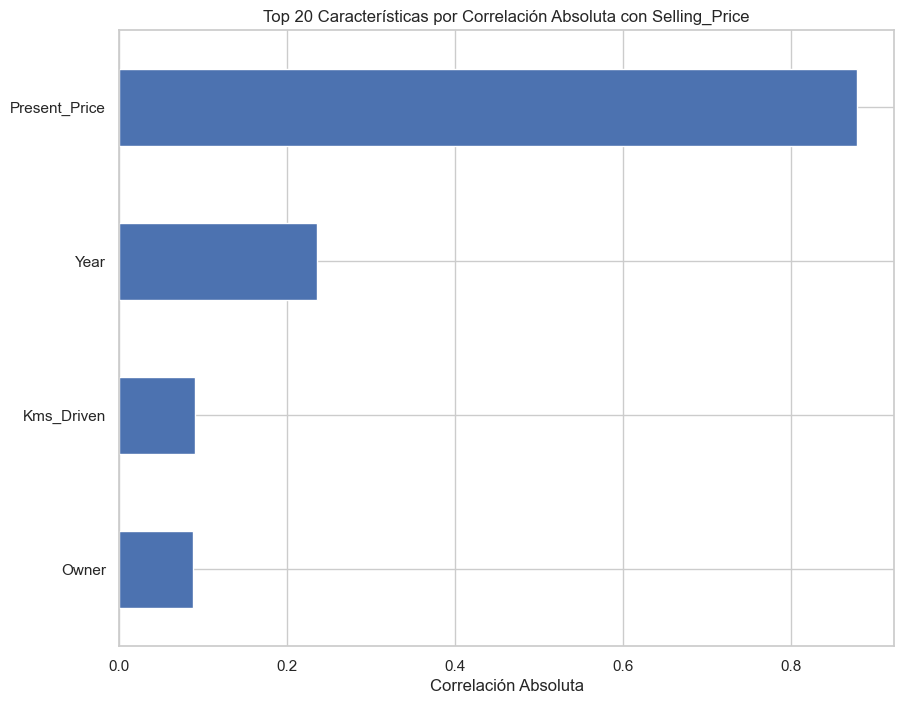

In [210]:
print("\n 1a. Correlación de Pearson con la Variable Objetivo")

if isinstance(y, pd.Series):
    correlations = X.corrwith(y) 
    sorted_correlations = correlations.abs().sort_values(ascending=False)

    print("Correlación (valor absoluto) con '{}':".format(target_variable))
    print(sorted_correlations.head(15)) 

    plt.figure(figsize=(10, 8))
    sorted_correlations.head(20).plot(kind='barh')
    plt.title('Top 20 Características por Correlación Absoluta con ' + target_variable)
    plt.xlabel('Correlación Absoluta')
    plt.gca().invert_yaxis() 
    plt.show()
else:
    print("Error: 'y' no es una Serie de Pandas. No se pudo calcular corrwith.")

In [216]:

from sklearn.feature_selection import SelectKBest, f_regression

print("\n 1b. Selección usando ANOVA F-test (f_regression)")


k_best_features = 5 

try:
   
    selector_f = SelectKBest(score_func=f_regression, k=k_best_features)
    
    # Aplicar fit_transform
    X_selected_f = selector_f.fit_transform(X, y) 
    selected_indices_f = selector_f.get_support(indices=True) 
    selected_features_f = X.columns[selected_indices_f] 

    print(f"Las {k_best_features} características seleccionadas por F-test son:")
    print(selected_features_f.tolist())

 
  
    scores = pd.Series(selector_f.scores_[selected_indices_f], index=selected_features_f) 
    print("\nScores F-test de las características seleccionadas:")
    print(scores.sort_values(ascending=False))


except ValueError as e:
    print(f"Error al aplicar F-test (ValueError): {e}. Asegúrate que no haya NaNs o Infs en X o y.")
except NameError as e:
    print(f"Error al aplicar F-test (NameError): {e}. ¿Faltó importar SelectKBest o f_regression?")
except Exception as e:
    print(f"Error inesperado al aplicar F-test: {e}")


 1b. Selección usando ANOVA F-test (f_regression)
Las 5 características seleccionadas por F-test son:
['Year', 'Present_Price', 'Kms_Driven', 'Owner']

Scores F-test de las características seleccionadas:
Present_Price   1015.923
Year              17.658
Kms_Driven         2.487
Owner              2.352
dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=4. All the features will be returned.
  warnings.warn(



2b. Selección usando Importancia de Random Forest
Importancia de Características según Random Forest:
Present_Price   0.885
Year            0.088
Kms_Driven      0.026
Owner           0.000
dtype: float64

Las 5 características más importantes según Random Forest son:
['Present_Price', 'Year', 'Kms_Driven', 'Owner']

--- Creando DataFrame Final con Características Seleccionadas (4) ---
Dimensiones de X_final: (301, 4)
Primeras filas de X_final:
   Present_Price   Year  Kms_Driven  Owner
0         -0.236  0.129      -0.312      0
1          0.222 -0.218       0.287      0
2          0.257  1.168      -1.065      0
3         -0.403 -0.910      -1.128      0
4         -0.088  0.129       0.266      0

Características finales seleccionadas:
['Present_Price', 'Year', 'Kms_Driven', 'Owner']


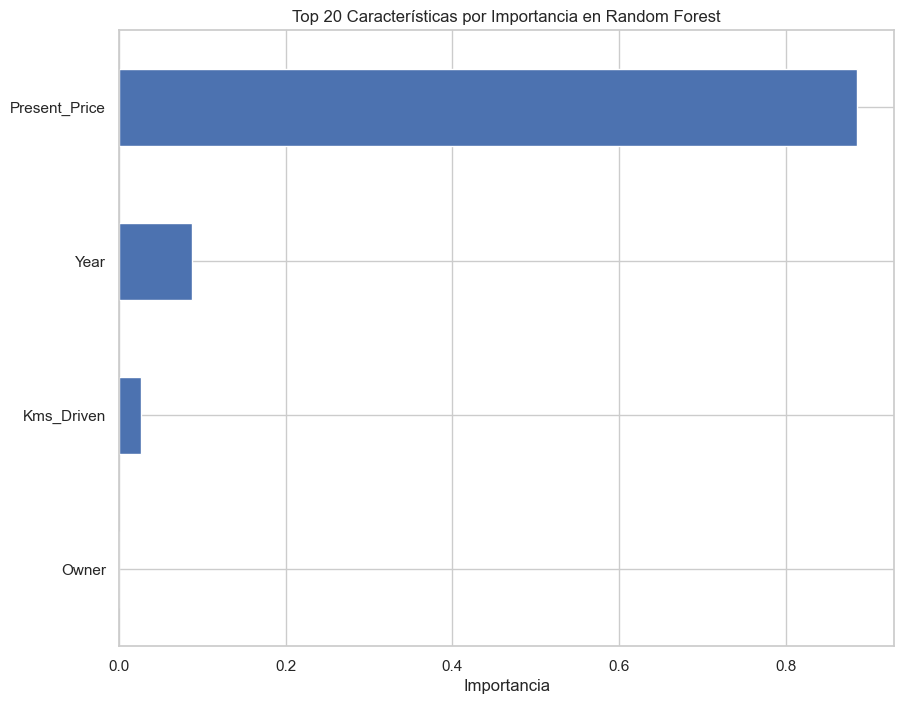

In [218]:
print("\n2b. Selección usando Importancia de Random Forest")
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

rf_importance = pd.Series(rf.feature_importances_, index=X.columns)
rf_importance = rf_importance.sort_values(ascending=False)

print("Importancia de Características según Random Forest:")
print(rf_importance.head(15))


selected_features_rf = rf_importance.head(k_best_features).index.tolist() 
print(f"\nLas {k_best_features} características más importantes según Random Forest son:")
print(selected_features_rf)


final_selected_features = ['Present_Price', 'Year', 'Kms_Driven', 'Owner'] # <-- Usa la lista de tu salida

print(f"\n--- Creando DataFrame Final con Características Seleccionadas ({len(final_selected_features)}) ---")

X_final = X[final_selected_features] 

print("Dimensiones de X_final:", X_final.shape)
print("Primeras filas de X_final:")
print(X_final.head())

print("\nCaracterísticas finales seleccionadas:")
print(final_selected_features)


# Grafica
plt.figure(figsize=(10, 8))
rf_importance.head(20).plot(kind='barh')
plt.title('Top 20 Características por Importancia en Random Forest')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.show()

# 4. Dividir el dataset en Train y Test para evaluar correctamente el
# modelo.

In [220]:
from sklearn.model_selection import train_test_split

if 'X_final' not in locals() or 'y' not in locals():
    print("Error: Asegúrate de que 'X_final' (features seleccionadas) y 'y' (target) estén definidos.")
    # Detener o manejar el error
elif X_final.empty or y.empty:
    print("Error: 'X_final' o 'y' están vacíos.")
    # Detener o manejar el error
else:
    print("División Train/Test ")
    print(f"Dimensiones de X_final antes de dividir: {X_final.shape}")
    print(f"Dimensiones de y antes de dividir: {y.shape}")

   
    test_set_size = 0.20 # Proporción del dataset
    random_seed = 42     # Semilla aleatoria por ahora sera siempre la misma


    X_train, X_test, y_train, y_test = train_test_split(
        X_final,              # DataFrame de características seleccionadas
        y,                    # Serie de la variable objetivo
        test_size=test_set_size, # Tamaño del conjunto de prueba
        random_state=random_seed # Semilla para que la división sea siempre igual
    )

    # Dimensiones
    print("\n--- División Completada ---")
    print("Dimensiones del conjunto de Entrenamiento:")
    print(f"  X_train: {X_train.shape}")
    print(f"  y_train: {y_train.shape}")
    print("\nDimensiones del conjunto de Prueba:")
    print(f"  X_test:  {X_test.shape}")
    print(f"  y_test:  {y_test.shape}")

    total_rows_split = X_train.shape[0] + X_test.shape[0]
    print(f"\nTotal de filas en Train + Test: {total_rows_split} (Original: {X_final.shape[0]})")

    print("\nLos conjuntos X_train, y_train se usarán para ENTRENAR el modelo.")
    print("Los conjuntos X_test, y_test se usarán para EVALUAR el modelo.")

División Train/Test 
Dimensiones de X_final antes de dividir: (301, 4)
Dimensiones de y antes de dividir: (301,)

--- División Completada ---
Dimensiones del conjunto de Entrenamiento:
  X_train: (240, 4)
  y_train: (240,)

Dimensiones del conjunto de Prueba:
  X_test:  (61, 4)
  y_test:  (61,)

Total de filas en Train + Test: 301 (Original: 301)

Los conjuntos X_train, y_train se usarán para ENTRENAR el modelo.
Los conjuntos X_test, y_test se usarán para EVALUAR el modelo.


# 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [222]:
import pandas as pd
import numpy as np

# Modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint, uniform

if 'X_train' not in locals() or 'X_test' not in locals() or 'y_train' not in locals() or 'y_test' not in locals():
     print("Error: Verificar de que X_train, X_test, y_train, y_test esten definidos")
     

In [224]:
print("Entrenando Modelo Base: Regresión Lineal ----------->>>>")
base_model = LinearRegression()

# Entrenar el modelo
base_model.fit(X_train, y_train)


cv_scores = cross_val_score(base_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"RMSE promedio (CV=5) en Entrenamiento: {-np.mean(cv_scores):.4f}")

# Evaluar en el conjunto de Prueba
print("\nEvaluación del Modelo Base en el Conjunto de Prueba:")
y_pred_base = base_model.predict(X_test)
mae_base = mean_absolute_error(y_test, y_pred_base)
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))
r2_base = r2_score(y_test, y_pred_base)

print(f"  Mean Absolute Error (MAE): {mae_base:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_base:.4f}")
print(f"  R-squared (R²): {r2_base:.4f}")

Entrenando Modelo Base: Regresión Lineal ----------->>>>
RMSE promedio (CV=5) en Entrenamiento: 2.1771

Evaluación del Modelo Base en el Conjunto de Prueba:
  Mean Absolute Error (MAE): 1.3803
  Root Mean Squared Error (RMSE): 2.0142
  R-squared (R²): 0.8239


In [167]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import traceback

print("\n--- 2. Entrenando Ridge Regression con GridSearchCV ---")
ridge_model = Ridge(random_state=42)

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0] 
}

# Configurar GridSearchCV
grid_search_ridge = GridSearchCV(estimator=ridge_model, 
                                 param_grid=param_grid_ridge, 
                                 cv=5, 
                                 scoring='neg_root_mean_squared_error',
                                 n_jobs=-1) #cores disponibles

# Ajustar GridSearchCV 
grid_search_ridge.fit(X_train, y_train)

# mejor score
print(f"Mejores Hiperparámetros para Ridge: {grid_search_ridge.best_params_}")
print(f"Mejor RMSE (CV=5) en Entrenamiento: {-grid_search_ridge.best_score_:.4f}")

# Obtener  modelo encontrado por GridSearchCV
best_ridge_model = grid_search_ridge.best_estimator_

# Evaluar el MEJOR modelo 
print("\nEvalur del Mejor Modelo Ridge en el Conjunto de Prueba:")
y_pred_ridge = best_ridge_model.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"  Mean Absolute Error (MAE): {mae_ridge:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_ridge:.4f}")
print(f"  R-squared (R²): {r2_ridge:.4f}")


--- 2. Entrenando Ridge Regression con GridSearchCV ---
Mejores Hiperparámetros para Ridge: {'alpha': 20.0}
Mejor RMSE (CV=5) en Entrenamiento: 2.1012

Evalur del Mejor Modelo Ridge en el Conjunto de Prueba:
  Mean Absolute Error (MAE): 1.4501
  Root Mean Squared Error (RMSE): 2.0918
  R-squared (R²): 0.8100


In [169]:
print("\n Entrenando Random Forest Regressor con RandomizedSearchCV ----->>>")
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

param_dist_rf = {
    'n_estimators': randint(50, 300),       
    'max_depth': [None] + list(randint(5, 30).rvs(5)), 
    'min_samples_split': randint(2, 11),    
    'min_samples_leaf': randint(1, 11),     
    'max_features': ['sqrt', 'log2', None] + list(uniform(0.5, 0.5).rvs(2))
}

# Configurar RandomizedSearchCV

n_iterations = 50
random_search_rf = RandomizedSearchCV(estimator=rf_model,
                                      param_distributions=param_dist_rf,
                                      n_iter=n_iterations,
                                      cv=5,
                                      scoring='neg_root_mean_squared_error',
                                      n_jobs=-1,
                                      random_state=42,
                                      verbose=1)

# Ajustar RandomizedSearchCV a los datos de entrenamiento
random_search_rf.fit(X_train, y_train)

# Obtener  mejor score
print(f"\nMejores Hiperparámetros para Random Forest: {random_search_rf.best_params_}")
print(f"Mejor RMSE (CV=5) en Entrenamiento: {-random_search_rf.best_score_:.4f}")

# Obtener el mejor modelo encontrado
best_rf_model = random_search_rf.best_estimator_

# Evaluar  modelo Random Fores
print("\nEvaluacion del Mejor Modelo Random Forest en el Conjunto de Prueba:")
y_pred_rf = best_rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"  Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"  R-squared (R²): {r2_rf:.4f}")


 Entrenando Random Forest Regressor con RandomizedSearchCV ----->>>
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Mejores Hiperparámetros para Random Forest: {'max_depth': None, 'max_features': 0.7993292420985183, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 235}
Mejor RMSE (CV=5) en Entrenamiento: 1.7327

Evaluacion del Mejor Modelo Random Forest en el Conjunto de Prueba:
  Mean Absolute Error (MAE): 0.6946
  Root Mean Squared Error (RMSE): 1.1217
  R-squared (R²): 0.9454


In [226]:
print("\nResumen de Evaluación en Conjunto de Prueba --->>>")
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest'],
    'MAE': [mae_base, mae_ridge, mae_rf],
    'RMSE': [rmse_base, rmse_ridge, rmse_rf],
    'R-squared (R²)': [r2_base, r2_ridge, r2_rf]
}
results_df = pd.DataFrame(results)
print(results_df.round(4))



Resumen de Evaluación en Conjunto de Prueba --->>>
               Model   MAE  RMSE  R-squared (R²)
0  Linear Regression 1.380 2.014           0.824
1   Ridge Regression 1.450 2.092           0.810
2      Random Forest 0.695 1.122           0.945


# 7. Realizar las diferentes gráficas que permitan visualizar los
# resultados del modelo.

--- Generando Gráfica: Reales vs. Predichos para Regresión Lineal ---


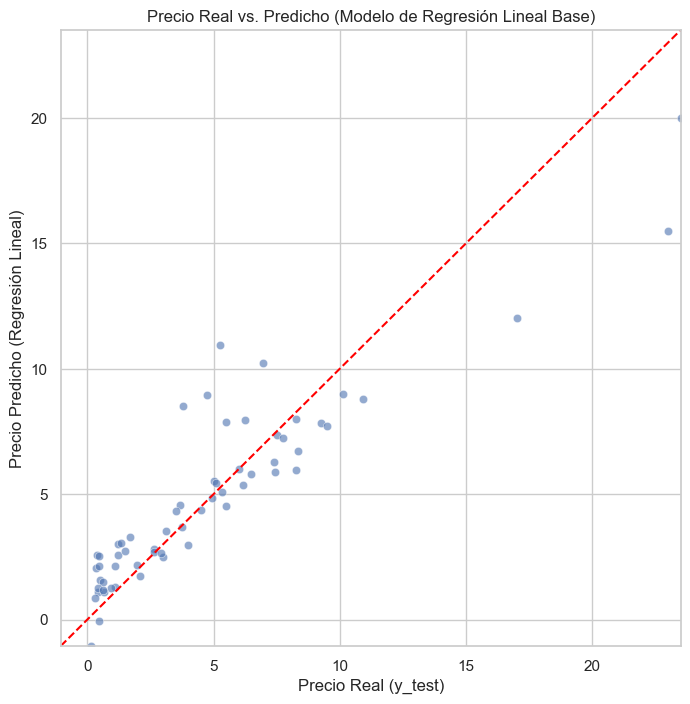

In [75]:

if 'y_test' not in locals() or 'y_pred_base' not in locals():
     print("Error: Asegúrate de que 'y_test' y 'y_pred_base' (predicciones de LinearRegression) existan.")
  #en caso de errores se pueden manejra errores aca
else:
    print("--- Generando Gráfica: Reales vs. Predicción de Precio para Regresión Lineal ---")
    
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=y_test, y=y_pred_base, alpha=0.6)
    plt.xlabel("Precio Real (y_test)")
    plt.ylabel("Precio Predicción de Precio (Regresión Lineal)")
    plt.title("Precio Real vs. Predicción de Precio (Modelo de Regresión Lineal Base)")

    max_val = max(y_test.max(), y_pred_base.max())
    min_val = min(y_test.min(), y_pred_base.min())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--') 
    plt.xlim(min_val, max_val) 
    plt.ylim(min_val, max_val)
    plt.grid(True)
    plt.show()

--- Generando Gráficas para el MEJOR modelo: RandomForestRegressor(max_features=0.6668543055695109, n_estimators=235,
                      n_jobs=-1, random_state=42) ---

1. Gráfica Reales vs. Predichos...


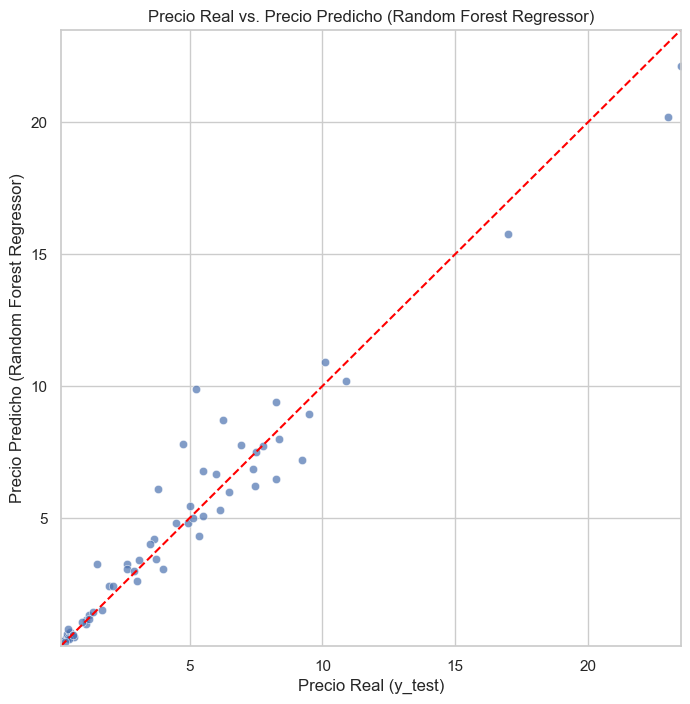


2. Gráfica Residuos vs. Predichos...


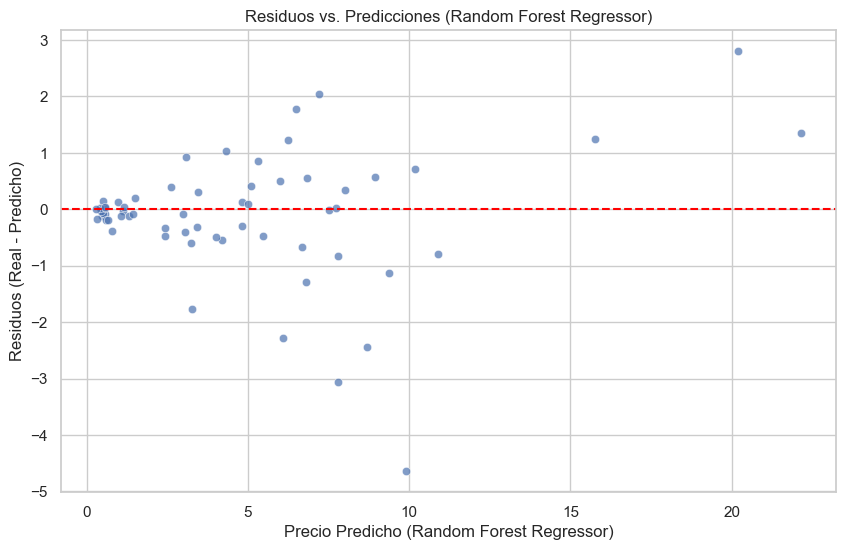


3. Gráfica Distribución de Residuos...


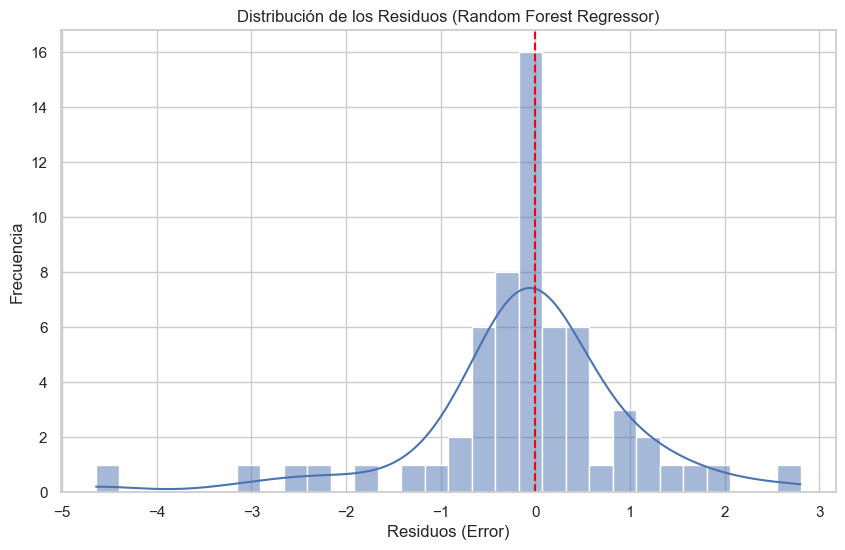


4. Gráfica Importancia de Características...


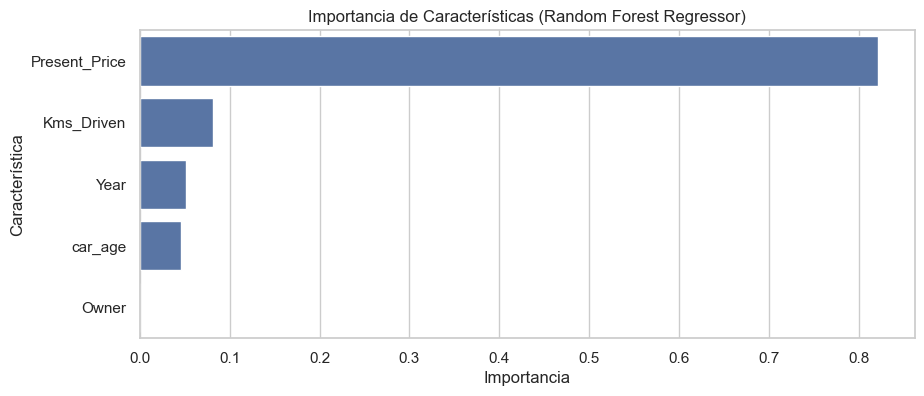


--- Gráficas generadas ---


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

if 'best_rf_model' not in locals() or 'y_pred_rf' not in locals() or 'y_test' not in locals() or 'X_test' not in locals():
     print("Error: No se encontraron las variables necesarias del mejor modelo (best_rf_model, y_pred_rf, y_test, X_test).")
     # Detener o manejar error
else:
    final_model = best_rf_model             # Modelo elegido
    model_name = "Random Forest Regressor"  # Nombre para el titulo
    y_pred_final = y_pred_rf                # Predicciones del modelo final
    

    residuals = y_test - y_pred_final
    
    print(f"--- Generando Gráficas para el MEJOR modelo: {best_rf_model} ---")


    print("\n1. Gráfica Reales vs. Predicción de Precio--------->>>>")
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=y_test, y=y_pred_final, alpha=0.7)
    plt.xlabel("Precio Real (y_test)")
    plt.ylabel(f"Precio Predicción de Precio ({model_name})")
    plt.title(f"Precio Real vs. Precio Predicción de Precio ({model_name})")
    max_val = max(y_test.max(), y_pred_final.max())
    min_val = min(y_test.min(), y_pred_final.min())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--') 
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    plt.grid(True)
    plt.show()

    
    print("\n2. Gráfica Residuos vs. Predicción de Precio---->>>>>>>")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred_final, y=residuals, alpha=0.7)
    plt.xlabel(f"Precio Predicción de Precio ({model_name})")
    plt.ylabel("Residuos (Real - Predicción de Precio)")
    plt.title(f"Residuos vs. Predicciones ({model_name})")
    plt.axhline(y=0, color='red', linestyle='--') 
    plt.grid(True)
    plt.show()

 
    print("\n3. Gráfica Distribución de Residuos--->>>>>")
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30)
    plt.xlabel("Residuos (Error)")
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de los Residuos ({model_name})")
    plt.axvline(x=0, color='red', linestyle='--') 
    plt.grid(True)
    plt.show()

  
    print("\n4. Gráfica Importancia de Características---->>>>")
    if hasattr(final_model, 'feature_importances_'):
        importances = final_model.feature_importances_
      
        feature_names = X_test.columns 
        
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, max(4, len(feature_names) * 0.6))) # Ajustar altura
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title(f'Importancia de Características ({model_name})')
        plt.xlabel('Importancia')
        plt.ylabel('Característica')
        plt.show()
    else:
         print(f"El modelo {model_name} no tiene el atributo 'feature_importances_'.")

    print("\n--- Gráficas generadas ---")

# 8. Interpretar, analizar y documentar los resultados obtenidos

Dataset Vehicle
En el análisis de los resultados, se logro identificar los puntos claves que
permite la regresión lineal, entre relación entre la variable dependiente la variable dependiente
y las variables independientes, se identificó el “selling_price esta es la variable dependiente, la cual se puede
predecir desde las variables year y y kms_driven.

Esto concluye que las características para el precio de venta de un
vehículo, donde se contempla su año, vehículo, donde se contempla su año, kilometraje, m kilometraje, marca, transmisión, arca, transmisión,
10
Imagen 4. Rendimiento del modelo de regresión lineal 
cilindraje y potencia, influyen directamente en el precio que se puede
cobrar por cada vehículo, y para el cliente que puede prever si el vehículo
que planea comprar es costoso.